<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MovingWindow" data-toc-modified-id="MovingWindow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MovingWindow</a></span><ul class="toc-item"><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting Started</a></span><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Installation" data-toc-modified-id="Installation-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Installation</a></span></li></ul></li><li><span><a href="#Run-the-Tests" data-toc-modified-id="Run-the-Tests-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Run the Tests</a></span></li><li><span><a href="#License" data-toc-modified-id="License-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>License</a></span></li><li><span><a href="#Documentation" data-toc-modified-id="Documentation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Documentation</a></span></li><li><span><a href="#Example---Naive-Signal-Processing" data-toc-modified-id="Example---Naive-Signal-Processing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Example - Naive Signal Processing</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Build-a-test-signal" data-toc-modified-id="Build-a-test-signal-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Build a test signal</a></span></li><li><span><a href="#Define-some-useful-functions" data-toc-modified-id="Define-some-useful-functions-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Define some useful functions</a></span></li><li><span><a href="#Naive-signal-processing-and-presentation-of-results" data-toc-modified-id="Naive-signal-processing-and-presentation-of-results-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Naive signal processing and presentation of results</a></span></li></ul></li><li><span><a href="#Example---Use-lambda-functions-to-define-custom-metrics" data-toc-modified-id="Example---Use-lambda-functions-to-define-custom-metrics-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Example - Use lambda functions to define custom metrics</a></span></li></ul></li></ul></div>

# MovingWindow 

In this module, a moving (or sliding, or rolling) window algorithm for filtering/processing signals is implemented. It has been created in order to serve as a tool in 1D signal processing. There are many different situations (find envelopes, trends, smooth or even normalize a signal) where a sliding window along with a properly selected metric (mean, max, min, rms, std, etc.) will do a great job. 

## Getting Started

### Dependencies

This module depends on three different packages:

* NumPy
* SciPy
* InputCheck


The first two packages are known to everyone interested in data science. Something like:


```text
pip install <packageName>
```


or 


```text
conda install <packageName>
```


if you use Anaconda or Miniconda will probably do the job.

For the installation of the third package please read the corresponding [README.md](https://github.com/ekarakasis/InputCheck/blob/master/README.md)

### Installation

To install this package just download the repository from GitHub or by using the following command line:


```text
git clone https://github.com/ekarakasis/MovingWindow
```


Afterwards, go to the local root folder, open a command line and run:


```text
pip install .
```


**NOTE:** *Do not forget the dot punctuation mark (".") in the end of the "pip install ." command*

Alternatively, you can add the "*root/MovingWindow*" folder to your project and add manually the module by using something like:


```python
import sys
sys.path.append('../MovingWindow/')

from MovWin import MovingWindow
```

## Run the Tests

To run the tests just go to the *root/MovingWindow/tests* folder, open a command line and write:


```text
python test_all.py
```

## License

This project is licensed under the MIT License.

## Documentation

**Function Definition:**

```python
MovWin.MovingWindow(
    signal, 
    windowSize=16, 
    step=1, 
    metric=np.mean, 
    window='box', 
    normalizedWindow=False
)
```


**<u>Parameters</u>**

* **signal** : *numpy.ndarray*
    * The actual signal we want to process.

* **windowSize** : *int*
  * The size of the moving window. This input must have value greater 
    than or equal to 2.

* **step** : *int*
  * Determines the overlap percentage of two consecutive windows. 
    This input must have value greater than or equal to 1.

* **metric** : *<class 'function'>*
  * A function which is applied to each window 
    (e.g. for a *moving average* the metric must be <np.mean\>).

* **window** : *str*
  * The window type we want to apply. The allowed window types are:
    * box
    * gaussian
    * nuttall
    * hanning
    * hann
    * hamming
    * blackman
    * blackmanharris

* **normalizedWindow** : *bool*
  * When this flag is True, the selected window (e.g. hann) is 
    normalized so as the sum of its elements to be equal to 1.


**<u>Raises</u>**

* **TypeError**
  * If any input has different type.
* **ValueError**
  * If any input has value different than the expected.


**<u>Returns</u>**

* **numpy.ndarray** 
  * The function returns a moving window-based processed signal.

## Example - Naive Signal Processing

### Import Packages

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../')

try:
    from MovingWindow.MovWin import MovingWindow
except ModuleNotFoundError:
    sys.path.append('../MovingWindow/')
    from MovWin import MovingWindow

import matplotlib.pyplot as plt
from scipy.signal import periodogram
import numpy as np

# adjusts the width of notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

### Build a test signal

This signal will be used in the following examples.

In [2]:
fs = 128                  # <-- sampling frequency (Hz)
L = 32 * fs               # <-- signal length
t = np.arange(0, L) / fs  # <-- time in seconds
f1 = 1.5                  # <-- 1st main frequency component of the signal (Hz)
f2 = 0.5                  # <-- 2nd main frequency component of the signal (Hz)

noise = np.array(
    MovingWindow(
        np.array(2 * np.random.rand(L) - 1) * 2, 7, 1, np.mean, 'box', False))
sinesig1 = np.sin(2 * np.pi * f1 * t)
sinesig2 = 0.75 * np.sin(2 * np.pi * f2 * t)

signal = sinesig1 + sinesig2 + noise  # <-- test signal

### Define some useful functions

<div class="alert alert-block alert-info">
<b>NOTE:</b> These functions have been designed for the specific characteristics of the test signal.
</div>

In [3]:
def UpperEnvelop(signal, fs):
    return MovingWindow(
        MovingWindow(signal, int(fs * 0.5), 1, np.max, 'box', False), 
        int(fs), 1, np.sum, 'gaussian', True)


def LowerEnvelop(signal, fs):
    return MovingWindow(
        MovingWindow(signal, int(fs * 0.5), 1, np.min, 'box', False), 
        int(fs), 1, np.sum, 'gaussian', True)


def Trend(signal, fs):
    return MovingWindow(signal, int(fs * 2), 1, np.sum, 'gaussian', True)


def Detrend(signal, fs):
    trend = Trend(signal, fs)
    return signal - trend


def Norm01(signal, fs):
    signal_ue = UpperEnvelop(signal, fs)
    signal_le = LowerEnvelop(signal, fs)
    return (signal - signal_le) / (signal_ue - signal_le)


def Smooth(signal, fs):
    return MovingWindow(signal, int(fs * 0.2), 1, np.sum, 'gaussian', True)


# def nextpow2(x):
#     n = 1
#     while n < x: n *= 2
#     return n


def FFT(x, fs):
    Y = np.abs(np.fft.rfft(x))
    L = len(Y)
    Y = Y / L
    f = (fs / 2) * np.arange(L) / L
    return f, Y

### Naive signal processing and presentation of results

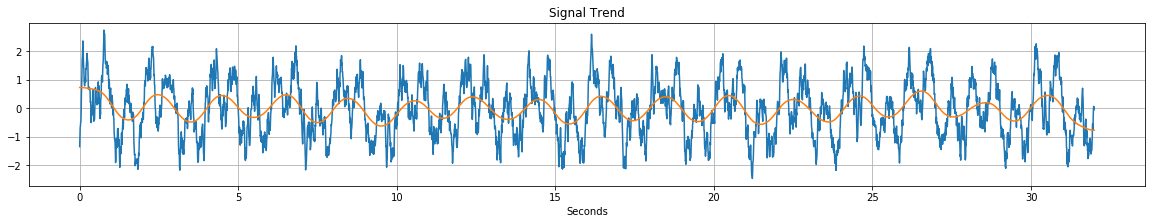

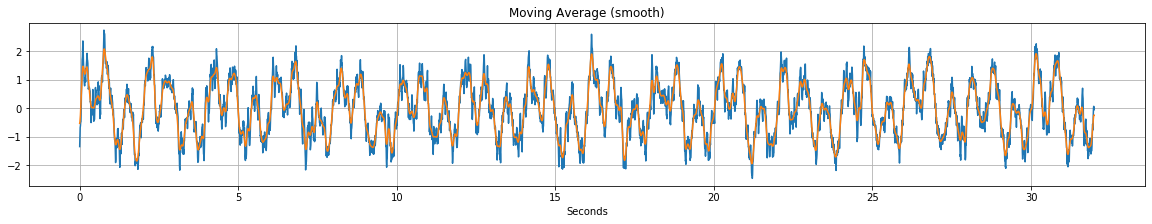

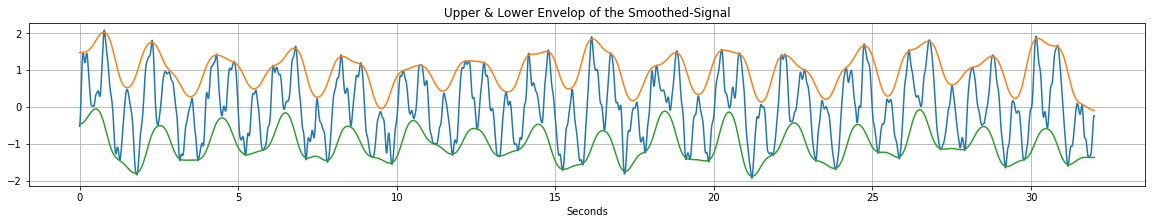

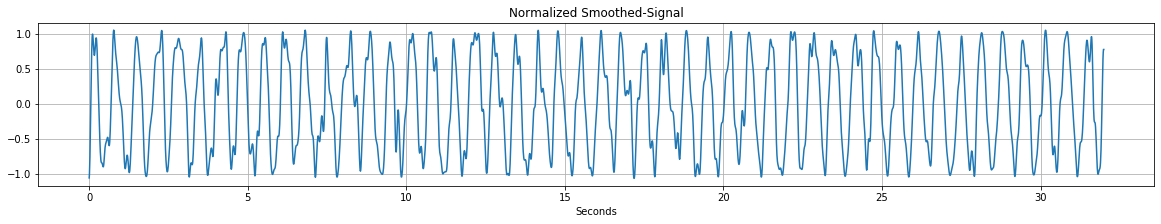

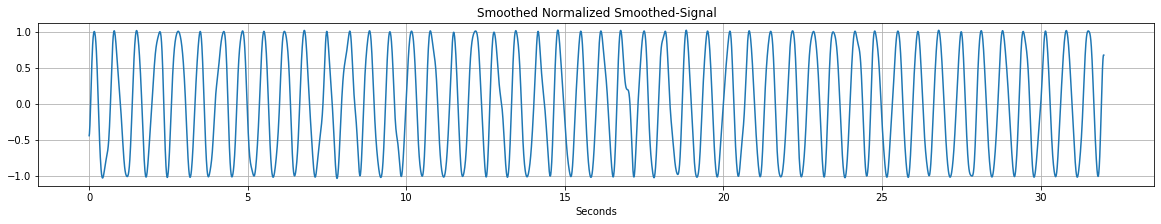

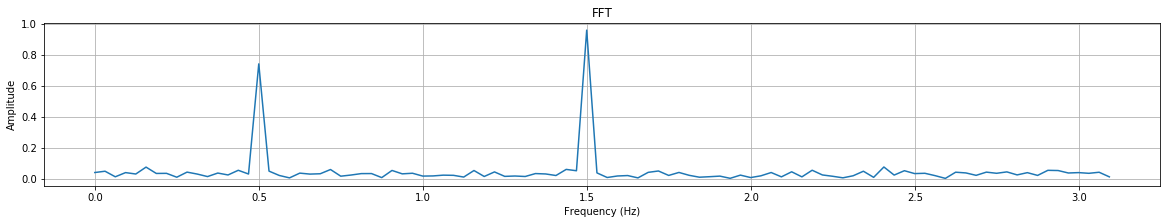

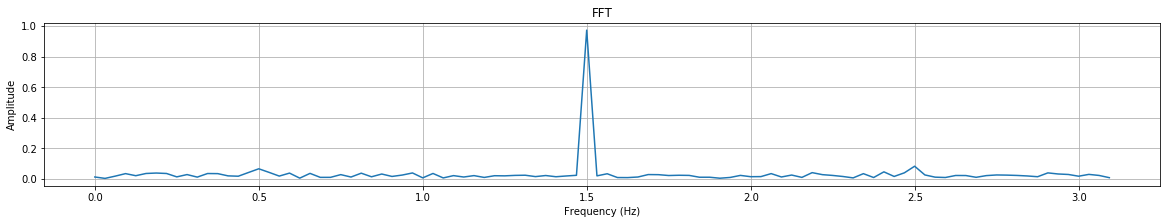

In [4]:
#
# =======================
# Naive signal processing
# =======================
#
trend = Trend(signal, fs)
signal_sm = Smooth(signal, fs)
signal_ue = UpperEnvelop(signal_sm, fs)
signal_le = LowerEnvelop(signal_sm, fs)
signal_nr = 2 * Norm01(signal_sm, fs) - 1
sig_smx3_nr = 2 * Norm01(Smooth(Smooth(Smooth(signal_nr, fs), fs), fs), fs) - 1

f1, Y1 = FFT(signal, fs)
f2, Y2 = FFT(sig_smx3_nr, fs)


#
# ================
# Plot the results
# ================
#
def Plot(axisXLst, sigLst, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(20, 3))
    for X, Y in zip(axisXLst, sigLst):
        plt.plot(X, Y)
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


Plot([t, t], [signal, trend], 'Signal Trend', 'Seconds')
Plot([t, t], [signal, signal_sm], 'Moving Average (smooth)', 'Seconds')
Plot([t, t, t], [signal_sm, signal_ue, signal_le],
     'Upper & Lower Envelop of the Smoothed-Signal', 'Seconds')
Plot([t], [signal_nr], 'Normalized Smoothed-Signal', 'Seconds')
Plot([t], [sig_smx3_nr], 'Smoothed Normalized Smoothed-Signal', 'Seconds')

idx = range(100)
Plot([f1[idx]], [Y1[idx]], 'FFT', 'Frequency (Hz)', 'Amplitude')
Plot([f2[idx]], [Y2[idx]], 'FFT', 'Frequency (Hz)', 'Amplitude')

## Example - Use lambda functions to define custom metrics

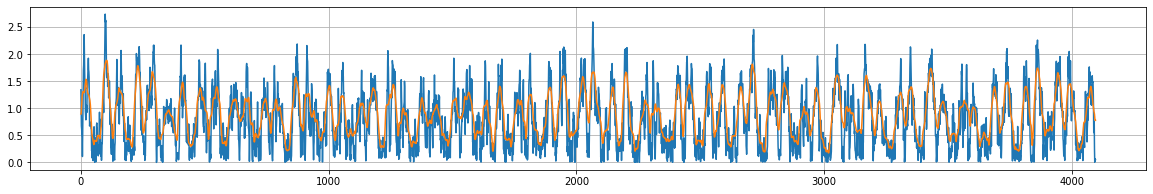

In [5]:
# build the rms metric using lambda function
rms = lambda x: np.sqrt(np.mean(np.power(x, 2)))

MovWinParams = {
    'signal': np.abs(signal),
    'windowSize': 20,
    'step': 1,
    'metric': rms,
    'window': 'box',
    'normalizedWindow': False,
}

signal_p = MovingWindow(**MovWinParams)
x = np.arange(len(signal_p))
Plot([x, x], [np.abs(signal), signal_p])